In [128]:
#import os as os

import math
import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [129]:
#Generate Data
user = list(range(0,10000))
m1 = np.random.normal(100,10,10000)
m2 = np.random.normal(105,5,10000)
m3 = np.random.normal(95,10,10000)
m4 = np.random.normal(100,5,10000)

df = pd.DataFrame({"user":user, "m1":m1,"m2":m2,"m3":m3,"m4":m4})
df.head()

In [135]:
df.head()

,user,m1,m2,m3,m4
0,0,96.488374,102.488969,98.411450,95.591265
1,1,117.917767,103.069411,89.240895,98.957220
2,2,101.247928,99.116378,96.894174,95.478400
3,3,101.201701,98.068840,89.819683,102.803309
4,4,95.895845,106.546823,97.435585,102.942527


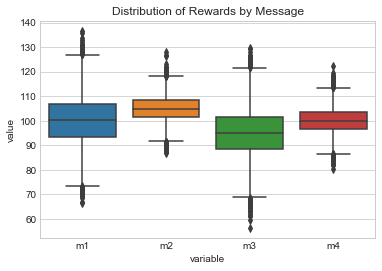

In [138]:
sns.boxplot(x="variable", y="value", data=pd.melt(df[['m1','m2','m3','m4']]))
plt.title("Distribution of Rewards by Message")
plt.savefig(".\img.png")

In [132]:
#df = pd.read_csv("./Ads_Optimisation.csv")
#df.head()

<h2>Upper Confidence Bound Algorithm</h2>

In [133]:
#Initialization
N = len(df.index)       # number of iterations
d = 4                   # number of possible messages
Qt_a = 0
Nt_a = np.zeros(d) #number of times action a has been selected prior to T
                            #If Nt(a) = 0, then a is considered to be a maximizing action.
c = 5                       #a number greater than = that controls the degree of exploration

sum_rewards = np.zeros(d) #cumulative sum of reward by selecting message

#loop through no of rounds 
hist_t = [] #holds the natural log
hist_achieved_rewards = [] #holds the history of the cumulative rewards chosen
hist_best_possible_rewards = [] #holds the history of cumulative optimal rewards
hist_random_choice_rewards = [] #holds the history of actions selected by random

#t = time
for t in range(0,N):
    UCB_Values = np.zeros(d) #array holding the ucb values. we pick the max
    max_upper_bnd = 0
    ad = 0
    
    action_selected = 0
    for a in range(0, d):
        if (Nt_a[a] > 0):
            ln_t = math.log(t) #natural log of t
            hist_t.append(ln_t) #to plot natural log of t

            #calculate the UCB
            Qt_a = sum_rewards[a]/Nt_a[a]
            ucb_value = Qt_a + c*(ln_t/Nt_a[a]) 
            UCB_Values[a] = ucb_value

        #if this equals zero, choose as the maximum. Cant divide by negative     
        elif (Nt_a[a] == 0):
            UCB_Values[a] = 1e500 #make large value
        
    #select the max value
    action_selected = np.argmax(UCB_Values)
    #print("selected {0}".format(action_selected))
    
    #Update Values
    Nt_a[action_selected] += 1
    reward = df.values[t, action_selected+1]
    sum_rewards[action_selected] += reward
    
    #for analysis
    r_ = df.values[t,[1,2,3,4]] #get all rewards for time t to a vector
    r_best = r_[np.argmax(r_)]      #select the best action
    
    pick_random = random.randrange(d)
    r_random = r_[pick_random] #np.random.choice(r_) #select reward for random action
    if len(hist_achieved_rewards)>0:
        hist_achieved_rewards.append(hist_achieved_rewards[-1]+reward)
        hist_best_possible_rewards.append(hist_best_possible_rewards[-1]+r_best)
        hist_random_choice_rewards.append(hist_random_choice_rewards[-1]+r_random)
    else:
        hist_achieved_rewards.append(reward)
        hist_best_possible_rewards.append(r_best)
        hist_random_choice_rewards.append(r_random)

<BarContainer object of 4 artists>

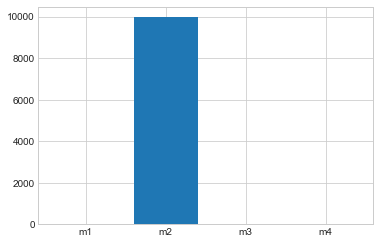

In [134]:
plt.bar(['m1','m2','m3','m4'],Nt_a)
#plt.bar([0,1,2,3,4,5,6,7,8,9],Nt_a)

Text(0.5, 1.0, 'Rewards Achieved')

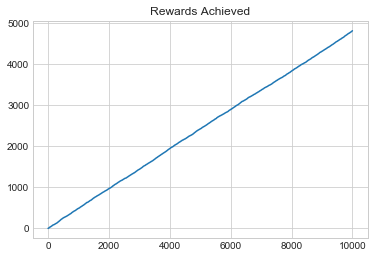

In [114]:
plt.plot(hist_best_possible_rewards)
plt.title("Rewards Achieved")

2322

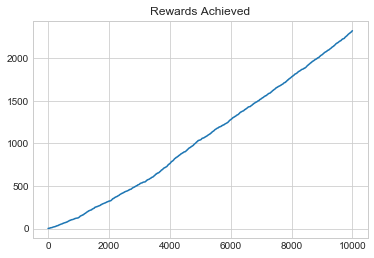

In [83]:
plt.plot(hist_achieved_rewards)
plt.title("Rewards Achieved")
hist_achieved_rewards[-1]

1262

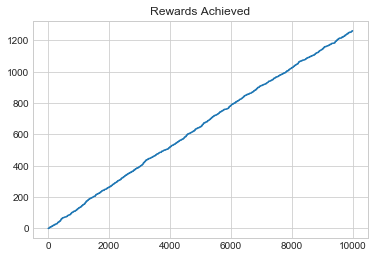

In [84]:
plt.plot(hist_random_choice_rewards)
plt.title("Rewards Achieved")
hist_random_choice_rewards[-1]

In [55]:
Nt_a

array([3.000e+00, 9.991e+03, 4.000e+00, 2.000e+00])

In [56]:
Nt_a

array([3.000e+00, 9.991e+03, 4.000e+00, 2.000e+00])

In [ ]:
plt.plot(hist_t)
plt.title("Natural Log of t")

In [ ]:
Nt_a

In [ ]:
q = [1,10,3]
np.random.choice(q)

In [ ]:
Nt_a

In [ ]:
total_cum_rewards = []
sum_rewards = np.zeros(d)

sum_rewards[2] = 10
total_cum_rewards.append(sum_rewards)

sum_rewards[1] = 15
total_cum_rewards.append(sum_rewards)

total_cum_rewards

In [ ]:
r = [1,2,3]
r[-1]

In [ ]:
r_ = df.values[2,[1,2,3,4]]
r_[np.argmax(r_)]

In [ ]:
 df.values[2,[1,2,3,4]]

In [ ]:
r_ = df.values[2,[1,2,3,4]]
r_ = np.random.choice(r_)

In [ ]:
np.random.choice(r_)